## Python statistics essential training - 04_04_testing

Standard imports

In [1]:
import math
import io

In [2]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as pp

%matplotlib inline

In [3]:
import scipy.stats
import scipy.optimize
import scipy.spatial

In [5]:
pumps = pd.read_csv("pumps.csv")

In [6]:
cholera = pd.read_csv("cholera.csv")

In [8]:
cholera.loc[0::20]

,deaths,lat,lon,x,y,closest
0,3,51.513418,-0.137930,-0.087301,0.008559,0
20,2,51.513441,-0.138762,-0.144856,0.011116,1
40,2,51.513025,-0.139036,-0.163811,-0.035126,1
60,1,51.512765,-0.137533,-0.059838,-0.064027,0
80,1,51.512782,-0.136819,-0.010446,-0.062137,0
100,4,51.512250,-0.135394,0.088131,-0.121273,5
120,1,51.513238,-0.134594,0.143473,-0.011449,4
140,1,51.512585,-0.134793,0.129707,-0.084035,4
160,1,51.514065,-0.134364,0.159384,0.080478,0
180,1,51.515149,-0.135395,0.088062,0.200973,0


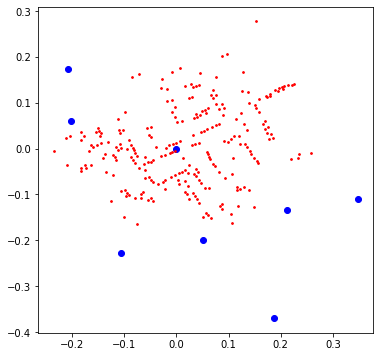

In [9]:
pp.figure(figsize=(6,6))
pp.scatter(pumps.x, pumps.y, color='b')
pp.scatter(cholera.x,cholera.y, color='r', s=3)

In [10]:
img = matplotlib.image.imread('london.png')

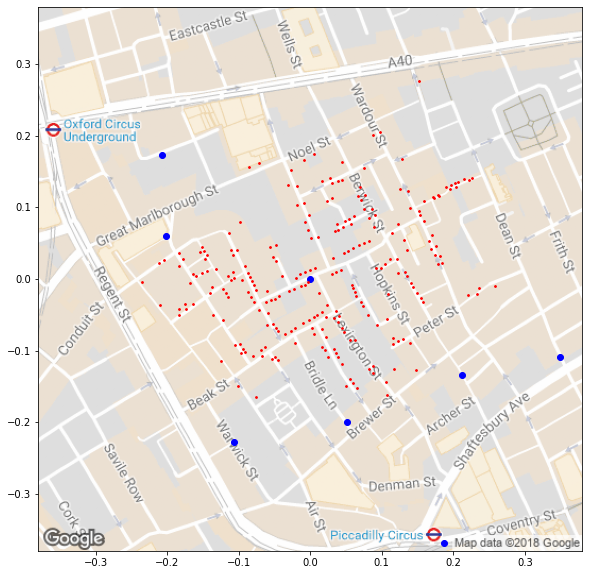

In [12]:
pp.figure(figsize=(10,10))
pp.imshow(img, extent=[-0.38,0.38,-0.38,0.38])
pp.scatter(pumps.x, pumps.y, color='b')
pp.scatter(cholera.x,cholera.y, color='r', s=3)

In [14]:
cholera.closest.value_counts()

0    171
1     36
4     19
5     13
7      9
2      2
Name: closest, dtype: int64

In [15]:
cholera.groupby('closest').deaths.sum()

closest
0    340
1     65
2      5
4     40
5     27
7     12
Name: deaths, dtype: int64

If the area near pump zero has more people, we should expect more deaths there. We will run a simulate with the assumption that the population of each area are different with many more people living near pump zero. Our simulation will select a number from 0,1,4,5 n times with the probabilities proportional to the population


In [17]:
def simulate(n):
    return pd.DataFrame({'closest': np.random.choice([0,1,4,5], size=n, p=[0.65,0.15,0.10,0.10])})

In [20]:
simulate(489).closest.value_counts()

0    337
1     58
5     50
4     44
Name: closest, dtype: int64

We are going to run the simulation 10000 times and only look at the returned values for pump 0 so that we can determine the distribution of values for pump 0

In [23]:
sampling = pd.DataFrame({'counts':[simulate(489).closest.value_counts()[0] for i in range(10000)]})

<AxesSubplot:>

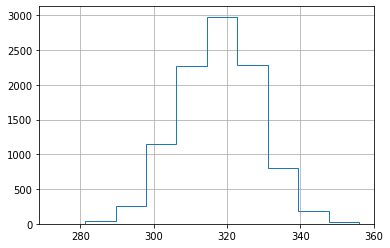

In [24]:
sampling.counts.hist(histtype='step')

With our distribution created we are going to use scipy.stats.percentileofscore to compute the percentile rank of the observed value of 340. 

Scipy.stats.percentileofscore computes a score relative to a list of scores. A percentileofscore of, for example, 80% means that 80% of the scores in a are below the given score.

In [26]:
scipy.stats.percentileofscore(sampling.counts,340)

In [30]:
p_value_percent = 100 - scipy.stats.percentileofscore(sampling.counts,340)
p_value = p_value_percent / 100
p_value

0.01885000000000005

Our distribution was generated under the null hypothesis that the pumps have nothing to do with cholera and that the number of deaths of proportional to the population. With a percentileofscore value of 98 that means that the actually value is very extreme and should not be expected if the null is "true". The p-value (smaller p-value the more we can reject the null) of 0.0186 means that we only expect the 340 value to occur 1.86% of the time. 